### Import all the Libraries

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings("ignore")


### Import the Dataset

In [2]:
#import the data set
df = pd.read_excel("cleaned_dataset.xlsx")

### Explore the Dataset

In [3]:
#exploring first n rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,NaN,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,Small,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#exploring last n rows
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3915,1627,32,Male,Sneakers,Footwear,35.0,Nevada,L,Orange,Summer,2.6,No,Next Day Air,Yes,Yes,45,Credit Card,Bi-Weekly
3916,2647,33,Male,T-shirt,Clothing,56.0,New Mexico,S,Lavender,Summer,3.9,No,Next Day Air,No,No,4,Debit Card,Every 3 Months
3917,1959,39,Male,Shorts,Clothing,67.0,Nevada,M,Gray,Winter,2.7,No,Store Pickup,No,No,47,Cash,Quarterly
3918,3393,53,Female,Scarf,Accessories,74.0,New Jersey,XL,Blue,Winter,4.4,No,Free Shipping,No,No,6,Venmo,Bi-Weekly
3919,2474,57,Male,Socks,Clothing,98.0,Arkansas,M,Red,Winter,2.6,No,Next Day Air,No,No,28,Cash,Quarterly


In [5]:
#number of columns and rows of the dataset
df.shape

(3920, 18)

In [6]:
#data type of each column and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3920 non-null   int64  
 1   Age                     3920 non-null   object 
 2   Gender                  3920 non-null   object 
 3   Item Purchased          3920 non-null   object 
 4   Category                3893 non-null   object 
 5   Purchase Amount (USD)   3904 non-null   float64
 6   Location                3920 non-null   object 
 7   Size                    3920 non-null   object 
 8   Color                   3920 non-null   object 
 9   Season                  3920 non-null   object 
 10  Review Rating           3920 non-null   float64
 11  Subscription Status     3920 non-null   object 
 12  Shipping Type           3920 non-null   object 
 13  Discount Applied        3920 non-null   object 
 14  Promo Code Used         3920 non-null   

In [7]:
#checking the range of value for numeric columns
df.describe()

,Customer ID,Purchase Amount (USD),Review Rating,Previous Purchases
count,3920.000000,3904.000000,3920.000000,3920.000000
mean,1950.948980,59.742572,3.749643,25.342602
std,1124.927011,23.675762,0.716079,14.449893
min,1.000000,20.000000,2.500000,1.000000
25%,976.750000,39.000000,3.100000,13.000000
50%,1951.500000,60.000000,3.700000,25.000000
75%,2925.250000,80.250000,4.400000,38.000000
max,3900.000000,100.000000,5.000000,50.000000


1. Age column should be of int datatype but unfortunately, it is of object datatype. we'll address this issue while cleaning the Dataset.

<AxesSubplot:>

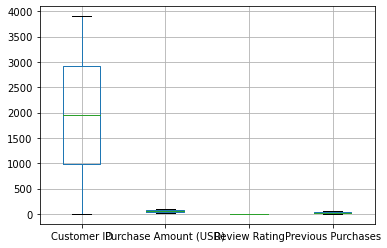

In [8]:
#checking whether there are any outliers
df.boxplot()

In [9]:
#exploring all the columns in the dataset
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Missing values treatment

In [10]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                  27
Purchase Amount (USD)     16
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating              0
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

Handiling Missing values for Category
* Category is the target variable.
* instead of droping the record, we can impute them.
* We can find the relation between Category and Item Purchased that is a particular item is always the same category.
* so we can fill the record with the help of Item purchased column.

In [11]:
#making key-value pairs 
item_to_category = {
    'Coat': 'Outerwear',
    'Jacket': 'Outerwear',
    'Sneakers': 'footwear',
    'Sandals': 'footwear',
    'Shoes': 'footwear',
    'Boots': 'footwear',
    'Blouse': 'Clothing',
    'Jeans':'Clothing',
    'Shirt':'Clothing',
    'Shorts':'Clothing',
    'Pants':'Clothing',
    'Skirt':'Clothing',
    'Hoodie':'Clothing',
    'T-shirt':'Clothing',
    'Dress':'Clothing',
    'Scoks':'Clothing',
    'Sweater':'Clothing',
    'Backpack':'Accessories',
    'Belt':'Accessories',
    'Gloves':'Accessories',
    'Handbag':'Accessories',
    'Hat':'Accessories',
    'Jewelry':'Accessories',
    'Scarf':'Accessories',
    'Sunglasses':'Accessories'
}

In [12]:
def fill_category(row):
    if pd.isnull(row['Category']):  # Check if 'Category' is missing
        return item_to_category.get(row['Item Purchased'], row['Category'])  # Fill using the mapping
    return row['Category']

# Apply the function to fill missing category values
df['Category'] = df.apply(fill_category, axis=1)


In [13]:
#cross cheking whther null values are filled.
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)     16
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating              0
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

Filling null values for Purchase Amount

In [14]:
#inspecting the nulls in the column
df[df['Purchase Amount (USD)'].isnull()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
17,18,53,Male,Dress,Clothing,NaN,Mississippi,XL,Lavender,Winter,4.7,Yes,2-Day Shipping,Yes,Yes,36,Venmo,Quarterly
18,19,52,Male,Sweater,Clothing,NaN,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
128,129,20,Male,Scarf,Accessories,NaN,California,M,Gold,Spring,4.7,Yes,Standard,Yes,Yes,21,Credit Card,Fortnightly
227,228,50,Male,Jeans,Clothing,NaN,Rhode Island,M,Turquoise,Winter,4.2,Yes,Standard,Yes,Yes,25,Venmo,Fortnightly
495,496,33,Male,Handbag,Accessories,NaN,Michigan,XL,Cyan,Fall,3.3,Yes,Free Shipping,Yes,Yes,6,Debit Card,Fortnightly
552,553,24,Male,T-shirt,Clothing,NaN,Missouri,M,Peach,Fall,3.5,Yes,Express,Yes,Yes,18,Bank Transfer,Weekly
562,563,53,Male,Jeans,Clothing,NaN,Missouri,M,Blue,Summer,3.5,Yes,Standard,Yes,Yes,40,Debit Card,Annually
586,587,45,Male,Hoodie,Clothing,NaN,Wisconsin,S,Blue,Winter,4.9,Yes,2-Day Shipping,Yes,Yes,9,Venmo,Annually
633,634,66,Male,Sandals,Footwear,NaN,Minnesota,M,Orange,Spring,2.9,Yes,Express,Yes,Yes,50,Debit Card,Quarterly
815,816,30,Male,Hat,Accessories,NaN,West Virginia,L,Teal,Spring,3.0,Yes,Next Day Air,Yes,Yes,27,Venmo,Bi-Weekly


Imputing Missing Values

* we have null values in the Amount column that we can fill me imputation methods.
* For numerical variable we can use mean and median
* Here we choose Median Imputation.
* We calcualte medians for each item seperately so that filling null values will be more accurate.

In [15]:
# Calculate the median purchase amount for each category
item_medians = df.groupby('Item Purchased')['Purchase Amount (USD)'].median()

# Fill missing values based on the median of each category
for category, median_value in item_medians.items():
    df.loc[(df['Item Purchased'] == category) & (df['Purchase Amount (USD)'].isnull()), 'Purchase Amount (USD)'] = median_value

In [16]:
#cross checking the null values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Handling Incorrect Data Types

In [17]:
#check the datatypes of all columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3920 non-null   int64  
 1   Age                     3920 non-null   object 
 2   Gender                  3920 non-null   object 
 3   Item Purchased          3920 non-null   object 
 4   Category                3920 non-null   object 
 5   Purchase Amount (USD)   3920 non-null   float64
 6   Location                3920 non-null   object 
 7   Size                    3920 non-null   object 
 8   Color                   3920 non-null   object 
 9   Season                  3920 non-null   object 
 10  Review Rating           3920 non-null   float64
 11  Subscription Status     3920 non-null   object 
 12  Shipping Type           3920 non-null   object 
 13  Discount Applied        3920 non-null   object 
 14  Promo Code Used         3920 non-null   

In [18]:
# Analyse the Age column to check the issue
df.Age.value_counts()

57          90
69          88
41          86
25          85
27          84
49          84
32          83
62          83
54          83
58          82
50          82
31          81
19          81
42          80
28          80
43          79
29          77
37          77
46          76
59          75
63          75
56          75
68          75
36          74
55          73
52          73
64          73
35          72
23          72
51          72
45          72
65          72
40          72
53          71
47          71
30          71
66          71
18          70
39          70
38          70
26          69
24          69
34          68
70          68
48          68
21          68
22          66
61          65
60          65
33          64
20          63
67          54
44          51
21 years     1
50 years     1
Name: Age, dtype: int64

In [19]:
def convert_age(age):
    try:
        # If the entry is already numeric, return it as float
        return float(age)
    except ValueError:
        # If there is a ValueError, attempt to extract the numeric part
        age_str = str(age)
        # Extract digits from the string
        digits = ''.join(filter(str.isdigit, age_str))
        return float(digits) if digits else np.nan

# Apply the function to the Age column
df['Age'] = df['Age'].apply(convert_age)


In [20]:
# recheck the Age column
df.Age.value_counts()

57.0    90
69.0    88
41.0    86
25.0    85
49.0    84
27.0    84
50.0    83
54.0    83
62.0    83
32.0    83
58.0    82
19.0    81
31.0    81
28.0    80
42.0    80
43.0    79
29.0    77
37.0    77
46.0    76
68.0    75
59.0    75
56.0    75
63.0    75
36.0    74
55.0    73
52.0    73
64.0    73
51.0    72
45.0    72
65.0    72
40.0    72
35.0    72
23.0    72
66.0    71
30.0    71
47.0    71
53.0    71
18.0    70
39.0    70
38.0    70
21.0    69
24.0    69
26.0    69
34.0    68
48.0    68
70.0    68
22.0    66
61.0    65
60.0    65
33.0    64
20.0    63
67.0    54
44.0    51
Name: Age, dtype: int64

In [21]:
#verify the dtype of Age again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3920 non-null   int64  
 1   Age                     3920 non-null   float64
 2   Gender                  3920 non-null   object 
 3   Item Purchased          3920 non-null   object 
 4   Category                3920 non-null   object 
 5   Purchase Amount (USD)   3920 non-null   float64
 6   Location                3920 non-null   object 
 7   Size                    3920 non-null   object 
 8   Color                   3920 non-null   object 
 9   Season                  3920 non-null   object 
 10  Review Rating           3920 non-null   float64
 11  Subscription Status     3920 non-null   object 
 12  Shipping Type           3920 non-null   object 
 13  Discount Applied        3920 non-null   object 
 14  Promo Code Used         3920 non-null   

In [22]:
#check Size column
df.Size.value_counts()

M              1756
L              1057
S               665
XL              430
Medium            7
Small             2
Large             2
Extra Large       1
Name: Size, dtype: int64

* When we went through out the dataset intially with df.head(), 
* We found a record with small. so tried to find all the unique values in the column.
* We found some records written as Medium instead of abbrevation M, S as Small and so on.
* For this, we will use same method of creating a key- value pairs and then replacing them.

In [23]:
#creating the key-vale pairs
size_mapping = {
    'Small': 'S',
    'Medium': 'M',
    'Large': 'L',
    'Extra Large': 'XL'
}

# Replace inconsistent values using the mapping
df['Size'] = df['Size'].replace(size_mapping)


In [24]:
#verify the column again
df['Size'].value_counts()

M     1763
L     1059
S      667
XL     431
Name: Size, dtype: int64

### Handling Duplicates

In [25]:
df[df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3900,2971,24.0,Female,Jewelry,Accessories,74.0,Kansas,M,White,Winter,3.4,No,Free Shipping,No,No,44,Credit Card,Bi-Weekly
3901,1745,57.0,Male,Sunglasses,Accessories,63.0,Michigan,L,Teal,Winter,3.0,No,Standard,No,No,23,PayPal,Weekly
3902,1654,31.0,Male,Belt,Accessories,93.0,Colorado,L,Silver,Winter,3.0,No,2-Day Shipping,Yes,Yes,29,Debit Card,Bi-Weekly
3903,3851,27.0,Female,Jewelry,Accessories,74.0,Mississippi,L,Indigo,Summer,4.4,No,2-Day Shipping,No,No,25,Debit Card,Every 3 Months
3904,1337,23.0,Male,Sneakers,Footwear,85.0,Oregon,M,Charcoal,Spring,4.8,No,Store Pickup,Yes,Yes,44,Debit Card,Fortnightly
3905,2244,56.0,Male,Shirt,Clothing,21.0,Massachusetts,M,Teal,Winter,3.7,No,2-Day Shipping,No,No,13,Debit Card,Annually
3906,922,70.0,Male,Coat,Outerwear,24.0,South Dakota,L,Silver,Summer,4.1,Yes,Express,Yes,Yes,18,PayPal,Weekly
3907,976,58.0,Male,Sweater,Clothing,40.0,Washington,M,Olive,Summer,3.8,Yes,2-Day Shipping,Yes,Yes,2,Bank Transfer,Weekly
3908,1142,39.0,Male,Gloves,Accessories,33.0,Ohio,S,Silver,Winter,4.7,No,Next Day Air,Yes,Yes,23,PayPal,Fortnightly
3909,2973,31.0,Female,Jacket,Outerwear,39.0,New York,S,Indigo,Fall,4.2,No,Free Shipping,No,No,11,Venmo,Every 3 Months


In [26]:
#find the total number of duplicate rows
df.duplicated().sum()

20

In [27]:
# keep the first entries and drop the other repeated entries
df = df.drop_duplicates(keep='first')

In [28]:
#cross check the duplicates
df.duplicated().sum()

0

### Outliers Analysis using Boxplot

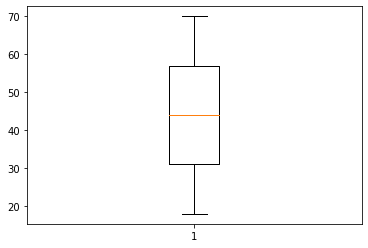

In [29]:
#create a boxplot for the Age column
plt.boxplot(df.Age)
plt.show()

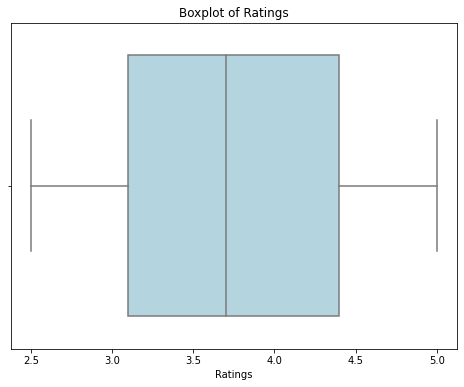

In [30]:
#create a voxplot for Review Ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Review Rating'], color='lightblue')
plt.title('Boxplot of Ratings')
plt.xlabel('Ratings')
plt.show()


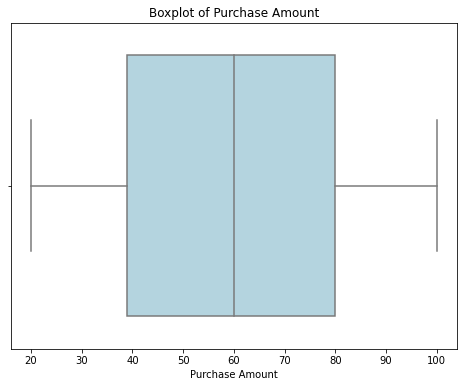

In [31]:
#create a voxplot for Purchase Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase Amount (USD)'], color='lightblue')
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

### Univariate Analysis

#### Which Category has highest count and lowest count?

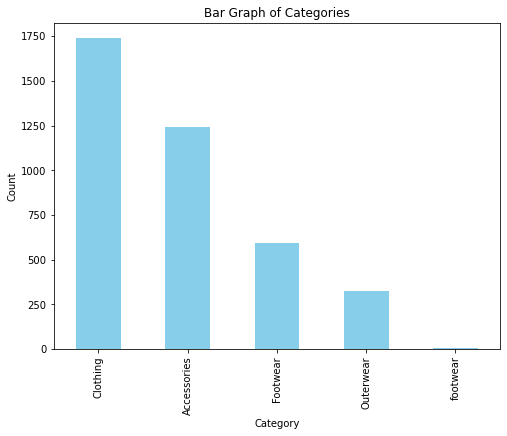

In [32]:
#Analyisis the frquency/count of Each category
plt.figure(figsize=(8, 6))
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Graph of Categories')
plt.show()

* Clothing Category tops the list follwed by Accessories,footwear and Outerwear.
* footwear is least in the list with very few sales.

#### what is the rating of most of the Items?

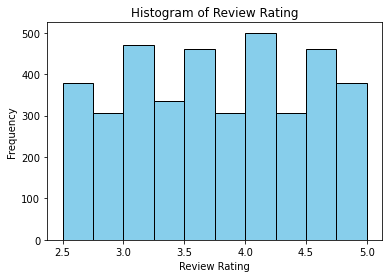

In [33]:
# Plot a histogram for the 'Review Rating' column
plt.hist(df['Review Rating'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Review Rating')

# Show the plot
plt.show()




* Most of the items has ratings around 4.0.

#### Analyse Review Rating Column.

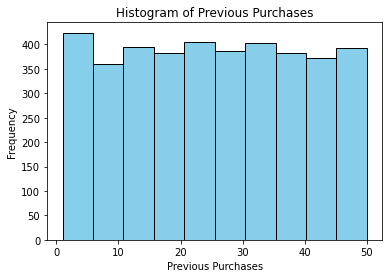

In [34]:
# Plot a histogram for the 'Review Rating' column
plt.hist(df['Previous Purchases'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Previous Purchases')
plt.ylabel('Frequency')
plt.title('Histogram of Previous Purchases')

# Show the plot
plt.show()


#### Which Size is sold most and sold least?

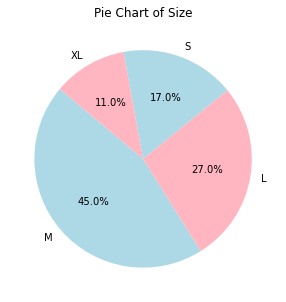

In [35]:
# Advanced Pie Chart
plt.figure(figsize=(8, 5))
df['Size'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)

# Adding labels and title
plt.title('Pie Chart of Size')
plt.ylabel('')
plt.show()


* M size is sold most i.e. 45 percent of total.
* XL size is sold least i.e.e 11 percent of total.
* S & L are sold on average of 17 percent and 27 percent of total. 

#### Compare Frequency of sales on whether Discount is applied or not.

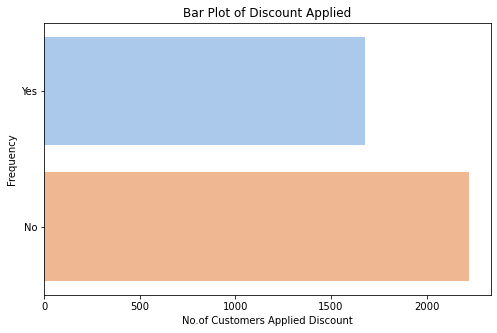

In [36]:
# Basic Ordered Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(y='Discount Applied', data=df, palette='pastel')

# Adding labels and title
plt.title('Bar Plot of Discount Applied')
plt.xlabel('No.of Customers Applied Discount')
plt.ylabel('Frequency')
plt.show()


* The number of Customers who applied discount are less than the customers who did not apply discount. But, the difference is only around 500

### Multivariate Analysis

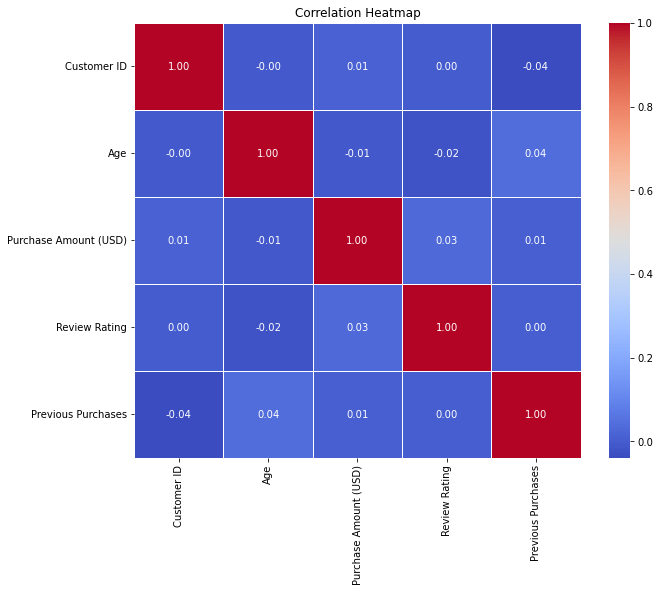

In [37]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()


* There is no notable relation between any  numeric columns.

### Feature Engineering

* We create **feature engineering** to add new columns based on previous columns, or adding two different columns, so that we can make advanced analysis on the data.

In [38]:
# Feature 1: Create 'High-Spending Customer' - Flag customers who spend more than the 75th percentile
df['High-Spending Customer'] = np.where(df['Purchase Amount (USD)'] > df['Purchase Amount (USD)'].quantile(0.75), 1, 0)

# Feature 2: Customer Recency - Create a 'Loyal Customer' flag based on number of previous purchases
df['Loyal Customer'] = np.where(df['Previous Purchases'] > df['Previous Purchases'].median(), 1, 0)

# Feature 3: Binning 'Purchase Amount (USD)' into categories
df['Spending Category'] = pd.cut(df['Purchase Amount (USD)'], bins=[0, 40, 60, 100], labels=['Low', 'Medium', 'High'])

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,High-Spending Customer,Loyal Customer,Spending Category
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,0,Medium
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,0,High
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,0,High
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1,1,High
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1,Medium


###  New Features Added

- **High-Spending Customer**:
  - A binary flag (`1` for customers spending above the 75th percentile, `0` otherwise).
  
- **Loyal Customer**:
  - A binary flag (`1` for customers with above-median previous purchases, `0` otherwise).

- **Spending Category**:
  - Categorizes customers into `Low`, `Medium`, and `High` spenders based on their purchase amount (binned ranges).


### Value counts of new features

In [39]:
from tabulate import tabulate

categorical_columns = ['Spending Category', 'High-Spending Customer', 'Loyal Customer']

for col in categorical_columns:
    value_counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True)
    
    # Create a DataFrame for tabular display
    table = pd.DataFrame({
        "Value": value_counts.index,
        "Count": value_counts.values,
        "Proportion": proportions.values
    })
    
    # Display the table using tabulate for better formatting
    print(f"\nValue Counts and Proportions for {col}:\n")
    print(tabulate(table, headers='keys', tablefmt='grid', showindex=False))



Value Counts and Proportions for Spending Category:

+---------+---------+--------------+
| Value   |   Count |   Proportion |
+=========+=========+==============+
| High    |    1914 |     0.490769 |
+---------+---------+--------------+
| Low     |    1053 |     0.27     |
+---------+---------+--------------+
| Medium  |     933 |     0.239231 |
+---------+---------+--------------+

Value Counts and Proportions for High-Spending Customer:

+---------+---------+--------------+
|   Value |   Count |   Proportion |
+=========+=========+==============+
|       0 |    2927 |     0.750513 |
+---------+---------+--------------+
|       1 |     973 |     0.249487 |
+---------+---------+--------------+

Value Counts and Proportions for Loyal Customer:

+---------+---------+--------------+
|   Value |   Count |   Proportion |
+=========+=========+==============+
|       0 |    1965 |     0.503846 |
+---------+---------+--------------+
|       1 |    1935 |     0.496154 |
+---------+---------+-

* Almost half of the customers are in high spending category.
* Customers who spend more than median and less than median are equal

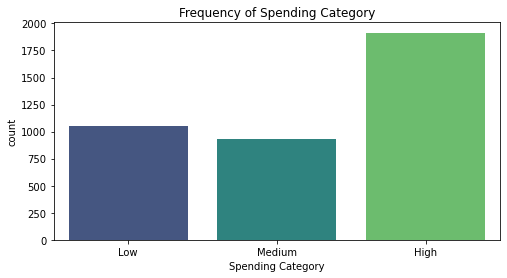

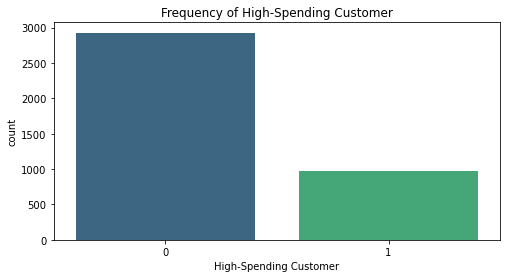

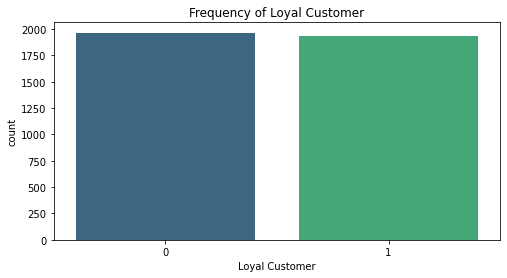

In [40]:

# Generate bar charts for categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.show()


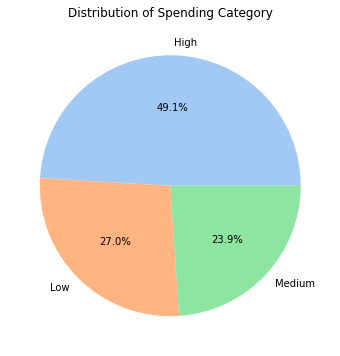

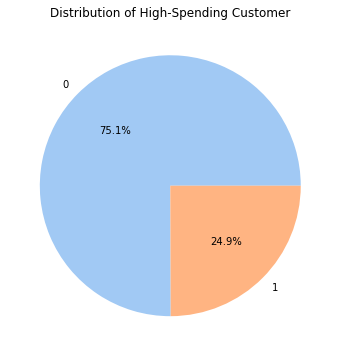

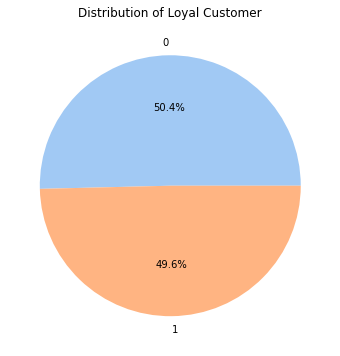

In [41]:
# Generate pie charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Remove y-label for aesthetics
    plt.show()


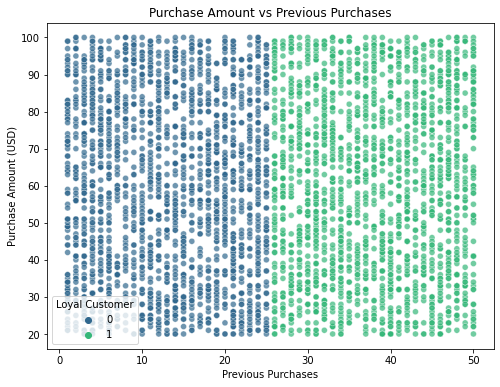

Correlation between 'Purchase Amount (USD)' and 'Previous Purchases': 0.01


In [42]:
# Scatter plot for numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df, hue='Loyal Customer', palette='viridis', alpha=0.7)
plt.title('Purchase Amount vs Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Compute correlation
correlation = df['Purchase Amount (USD)'].corr(df['Previous Purchases'])
print(f"Correlation between 'Purchase Amount (USD)' and 'Previous Purchases': {correlation:.2f}")


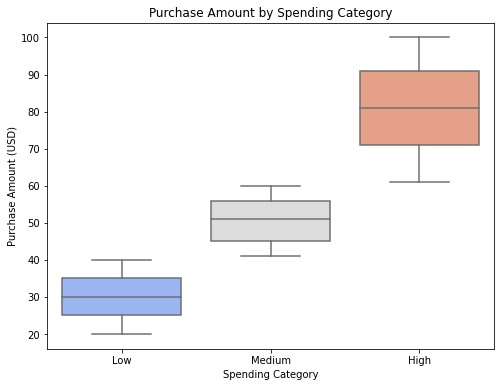

In [43]:
# Boxplot for numerical vs categorical
plt.figure(figsize=(8, 6))
sns.boxplot(x='Spending Category', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Purchase Amount by Spending Category')
plt.show()



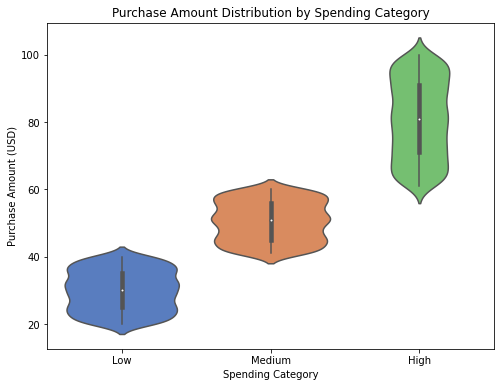

In [44]:
# Violin plot for additional insight
plt.figure(figsize=(8, 6))
sns.violinplot(x='Spending Category', y='Purchase Amount (USD)', data=df, palette='muted')
plt.title('Purchase Amount Distribution by Spending Category')
plt.show()


* **Trend:** As the spending category moves from "Low" to "High," the median purchase amount increases.
* **Variability:** The "High" spending category exhibits the widest variability, while the "Medium" category shows the least.


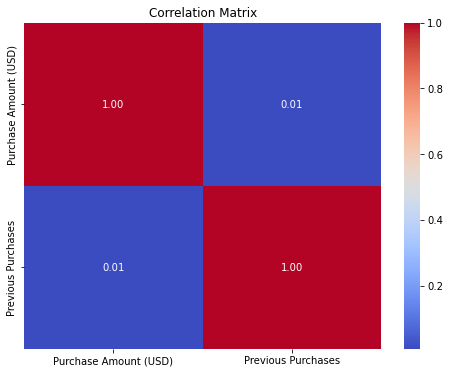

In [45]:
# Compute correlation matrix
numerical_columns = ['Purchase Amount (USD)', 'Previous Purchases']
correlation_matrix = df[numerical_columns].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Which Season generated highest number of sales?

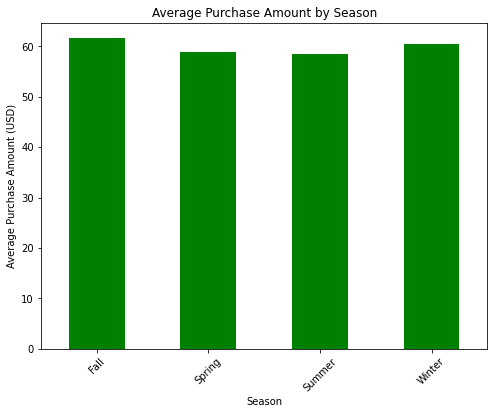

In [46]:
# Group by season and calculate average purchase amount
avg_seasonal_trend = df.groupby('Season')['Purchase Amount (USD)'].mean()

# Plot the average purchase amount by season
plt.figure(figsize=(8, 6))
avg_seasonal_trend.plot(kind='bar', color='green')
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()


#### Heatmap for Season vs High Spending Customers 

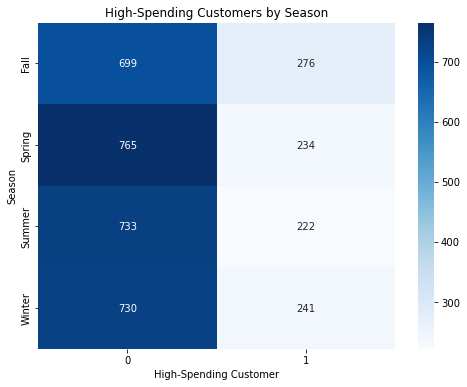

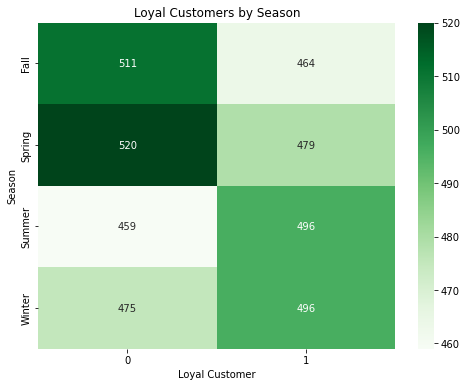

In [47]:
# Crosstab: High-Spending Customers by Season
cross_tab_season_high_spenders = pd.crosstab(df['Season'], df['High-Spending Customer'])

# Visualize the crosstab
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_season_high_spenders, annot=True, fmt='d', cmap='Blues')
plt.title('High-Spending Customers by Season')
plt.xlabel('High-Spending Customer')
plt.ylabel('Season')
plt.show()

# Crosstab: Loyal Customers by Season
cross_tab_season_loyal = pd.crosstab(df['Season'], df['Loyal Customer'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_season_loyal, annot=True, fmt='d', cmap='Greens')
plt.title('Loyal Customers by Season')
plt.xlabel('Loyal Customer')
plt.ylabel('Season')
plt.show()


#### Frequency count of customers for each Season.

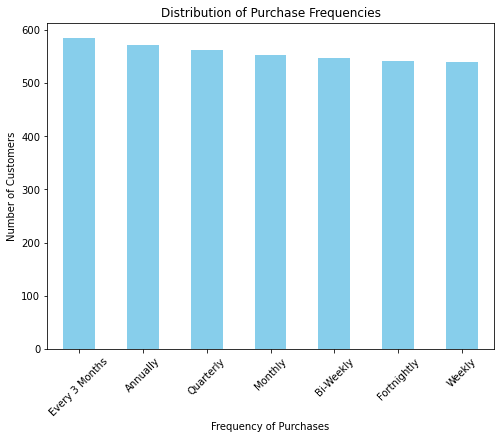

Proportion of Purchase Frequencies (%):
 Every 3 Months    14.974359
Annually          14.666667
Quarterly         14.435897
Monthly           14.179487
Bi-Weekly         14.025641
Fortnightly       13.897436
Weekly            13.820513
Name: Frequency of Purchases, dtype: float64


In [48]:
# Value counts for frequency of purchases
freq_counts = df['Frequency of Purchases'].value_counts()

# Plot distribution
plt.figure(figsize=(8, 6))
freq_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Purchase Frequencies')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Display proportions
freq_proportions = freq_counts / freq_counts.sum() * 100
print("Proportion of Purchase Frequencies (%):\n", freq_proportions)


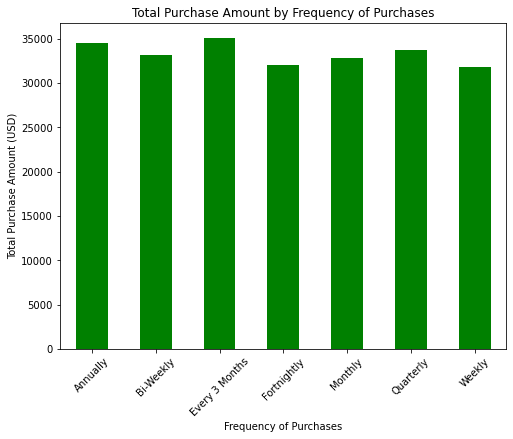

In [49]:
# Group by frequency and calculate total purchase amount
freq_revenue = df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum()

# Plot total revenue by purchase frequency
plt.figure(figsize=(8, 6))
freq_revenue.plot(kind='bar', color='green')
plt.title('Total Purchase Amount by Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()


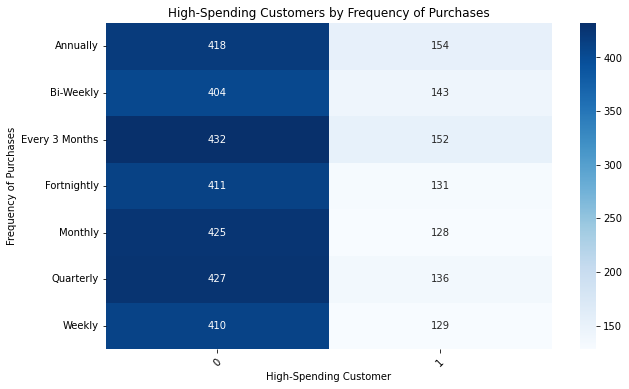

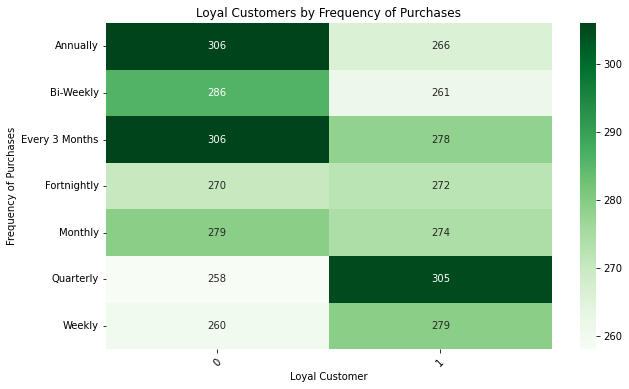

In [50]:
# Crosstab for High-Spending Customers by Frequency
cross_tab_high_spenders = pd.crosstab(df['Frequency of Purchases'], df['High-Spending Customer'])

# Visualize the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_high_spenders, annot=True, fmt='d', cmap='Blues')
plt.title('High-Spending Customers by Frequency of Purchases')
plt.xlabel('High-Spending Customer')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.show()

# Crosstab for Loyal Customers by Frequency
cross_tab_loyal = pd.crosstab(df['Frequency of Purchases'], df['Loyal Customer'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_loyal, annot=True, fmt='d', cmap='Greens')
plt.title('Loyal Customers by Frequency of Purchases')
plt.xlabel('Loyal Customer')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.show()


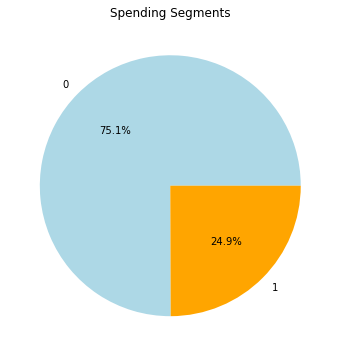

Spending Segments Distribution:
 0    2927
1     973
Name: High-Spending Customer, dtype: int64


In [51]:
# Count of High-Spending and Low-Spending Customers
spending_segments = df['High-Spending Customer'].value_counts()

# Visualize Spending Segments
plt.figure(figsize=(6, 6))
spending_segments.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Spending Segments')
plt.ylabel('')  # Remove y-label for aesthetics
plt.show()

# Insights
print("Spending Segments Distribution:\n", spending_segments)


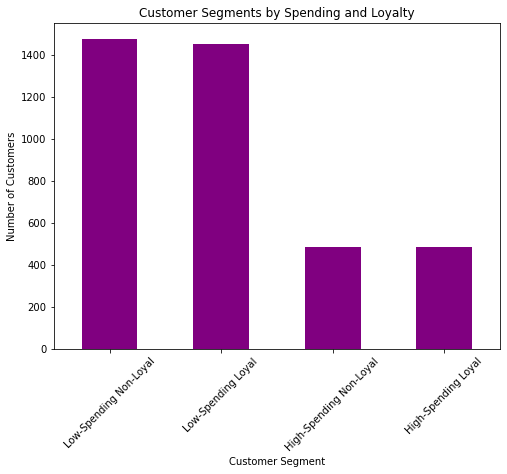

Combined Segments Distribution:
 Low-Spending Non-Loyal     1477
Low-Spending Loyal         1450
High-Spending Non-Loyal     488
High-Spending Loyal         485
Name: Customer Segment, dtype: int64


In [52]:
# Combine Spending and Loyalty into Segments
df['Customer Segment'] = df.apply(
    lambda x: 'High-Spending Loyal' if x['High-Spending Customer'] == 1 and x['Loyal Customer'] == 1 else
              'High-Spending Non-Loyal' if x['High-Spending Customer'] == 1 else
              'Low-Spending Loyal' if x['Loyal Customer'] == 1 else
              'Low-Spending Non-Loyal', axis=1)

# Count of Combined Segments
combined_segments = df['Customer Segment'].value_counts()

# Visualize Combined Segments
plt.figure(figsize=(8, 6))
combined_segments.plot(kind='bar', color='purple')
plt.title('Customer Segments by Spending and Loyalty')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Insights
print("Combined Segments Distribution:\n", combined_segments)


### Hypothesis Testing

 

* **Null Hypothesis (H₀):** There is no difference in the mean purchase amount between male and female customers.
* **Alternate Hypothesis (H₁):** There is a significant difference in the mean purchase amount between male and female customers.
* **Test:** Independent two-sample t-test.


In [56]:
from scipy.stats import ttest_ind

# Filter the purchase amounts for male and female customers
male_purchase = df[df['Gender'] == 'Male']['Purchase Amount (USD)'].dropna()
female_purchase = df[df['Gender'] == 'Female']['Purchase Amount (USD)'].dropna()

# Perform the independent two-sample t-test
t_stat, p_value = ttest_ind(male_purchase, female_purchase, equal_var=False)

# Output the results
print("Hypothesis Test: Gender and Purchase Amount")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean purchase amount between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean purchase amount between male and female customers.")


Hypothesis Test: Gender and Purchase Amount
t-statistic: -0.8720193971190384
p-value: 0.3832825294297926
Fail to reject the null hypothesis: There is no significant difference in the mean purchase amount between male and female customers.


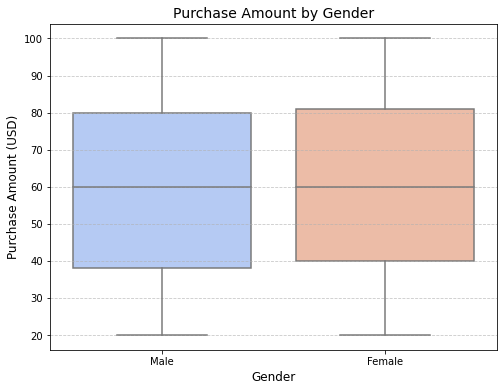

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for visualization
gender_purchase_data = df[['Gender', 'Purchase Amount (USD)']].dropna()

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=gender_purchase_data, palette='coolwarm')

# Customize the plot
plt.title('Purchase Amount by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**Hypothesis Test 2: Subscription Status and Review Rating**
* **Null Hypothesis (H₀):** Subscription status (Yes or No) has no effect on the average review rating.
* **Alternate Hypothesis (H₁):** Subscription status significantly affects the average review rating.
* **Test:** Independent two-sample t-test.

In [61]:
from scipy.stats import ttest_ind

# Filter the review ratings based on subscription status
subscribed = df[df['Subscription Status'] == 'Yes']['Review Rating'].dropna()
not_subscribed = df[df['Subscription Status'] == 'No']['Review Rating'].dropna()

# Perform the independent two-sample t-test
t_stat, p_value = ttest_ind(subscribed, not_subscribed, equal_var=False)

# Output the results
print("Hypothesis Test: Subscription Status and Review Rating")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Subscription status significantly affects the average review rating.")
else:
    print("Fail to reject the null hypothesis: Subscription status does not significantly affect the average review rating.")


Hypothesis Test: Subscription Status and Review Rating
t-statistic: -0.3970059234213549
p-value: 0.6914083059838173
Fail to reject the null hypothesis: Subscription status does not significantly affect the average review rating.


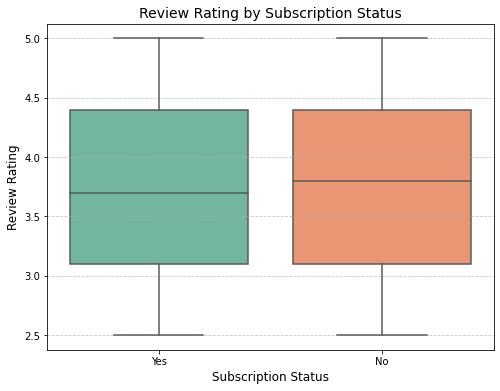

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for visualization
subscription_data = df[['Subscription Status', 'Review Rating']].dropna()

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription Status', y='Review Rating', data=subscription_data, palette='Set2')

# Customize the plot
plt.title('Review Rating by Subscription Status', fontsize=14)
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Review Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
